In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.cluster import KMeans
import sklearn.preprocessing
from sklearn.metrics import mean_squared_error as mse
from pandas.tools.plotting import scatter_matrix
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_validate

In [2]:
data = pd.read_csv('dengue.csv')
data = data.dropna()
keys = ['humid', 'temp' , 'h10pix', 'trees' , 'Xmin', 'Ymin']
X = np.array(data[keys])
Y = np.array(data['NoYes'])

/srv/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  """Entry point for launching an IPython kernel.


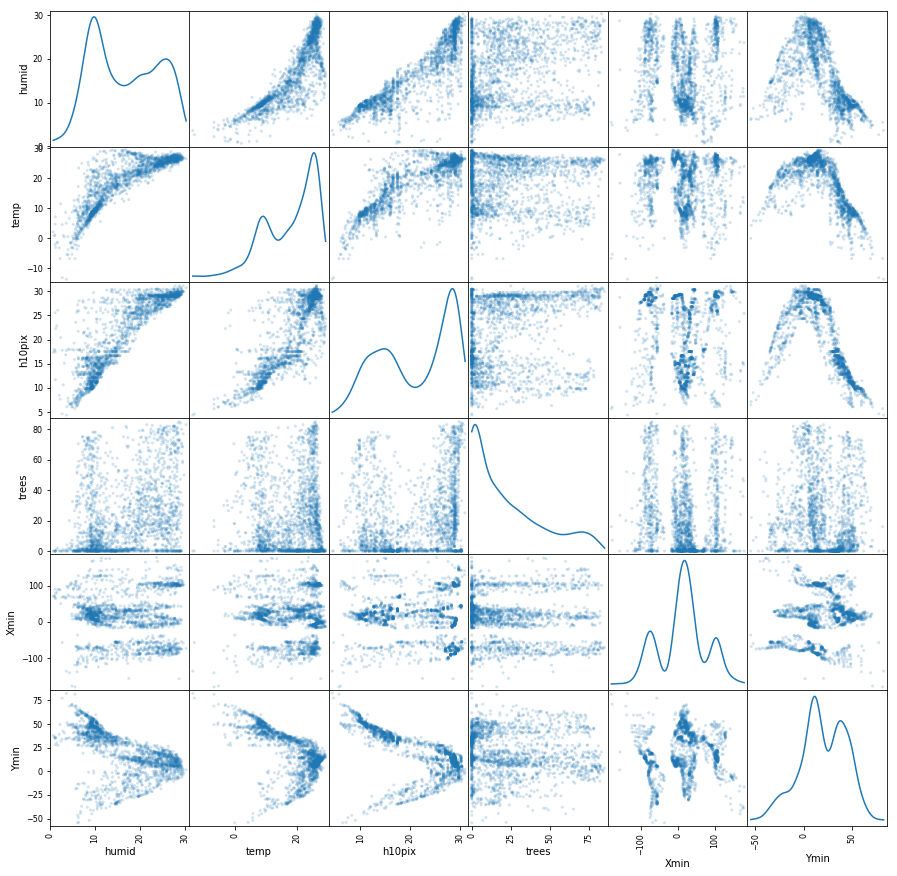

In [3]:
_ = scatter_matrix(data[keys], alpha=0.2, figsize=(15, 15), diagonal='kde')

In [4]:
train_data, test_data = sklearn.model_selection.train_test_split(data, train_size=0.6)

/srv/conda/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2069: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [5]:
Y_train = np.array(train_data['NoYes'])
X_train = np.array(train_data[keys])
Y_test = np.array(test_data['NoYes'])
X_test =np.array(test_data[keys])

In [3]:
def per_error(Y_real, Y_pred):
    N = len(Y_real)
    count = np.zeros(N)
    count[ Y_real != Y_pred] = 1
    return sum(count)/N

In [52]:
n_max = 20
n_clu = np.linspace(2,n_max, n_max-1, dtype = int)
scores = np.zeros(len(n_clu))
for i in range(0,len(n_clu)):
    trials = 10
    kf = KFold(n_splits=trials)    
    cumu_err = np.zeros(trials)
    j = 0
    for train_index, test_index in kf.split(X):
        X_train, X_test = X[train_index], X[test_index]
        Y_train, Y_test = Y[train_index], Y[test_index]
        kmeans = KMeans(n_clusters=n_clu[i])
        kmeans.fit(X_train, Y_train)
        Y_pred = kmeans.predict(X_test)
        cumu_err[j] += per_error(Y_test,Y_pred)
        j += 1
    scores[i] = np.mean(cum_err)

Mejor número de clusters= [ 2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]


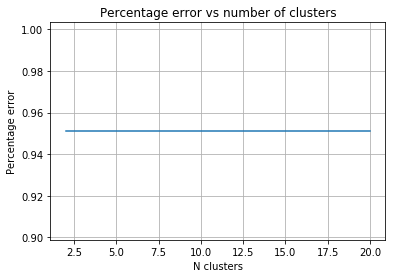

In [53]:
plt.plot(n_clu,scores)
plt.xlabel('N clusters')
plt.ylabel('Percentage error')
plt.grid()
plt.title('Percentage error vs number of clusters')
print('Mejor número de clusters=',n_clu[scores == min(scores)])

In [38]:
data2 = pd.read_csv('BreadBasket_DMS.csv')
data2 = data2.dropna()
keys = ['Date','Time','Transaction','Item']

In [39]:
X2 = np.array(data2[keys])
pca = PCA(n_components=2)
pca.fit(X2)

ValueError: could not convert string to float: '2016-10-30'

In [69]:
def date_to_num(s):
    y = s[0:3]
    y = (int(y))*365
    m = s[5:6]
    m = (int(m))*30
    d = s[8:9]
    d = int(d)
    return y + m +d

def time_to_num(s):
    h = int(s[0:1])*3600
    m = int(s[3:4])*60
    s = int(s[6:7])
    return h + m + s

In [70]:
print(date_to_num('1993-12-06'))
print(time_to_num('13:43:21'))

72665
3842
